# Reading the data

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set_theme()

In [2]:
data = pd.read_csv('../data/raw/medical_insurance_cost.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


No null values in the data set.

### Check duplicates

In [6]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
# Eliminate duplicate
data.drop_duplicates(inplace = True)

In [8]:
# Factorize Categorical Variables
data['sex'] = pd.factorize(data['sex'])[0]
data['smoker'] = pd.factorize(data['smoker'])[0]
data['region'] = pd.factorize(data['region'])[0]

In [10]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [12]:
# Min-Max Scaler
variables = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

scaler = MinMaxScaler()
scaler_features = scaler.fit_transform(data[variables])
data_scaler = pd.DataFrame(
  data = scaler_features,
  index = data.index,
  columns = variables
)

data_scaler.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.321227,0.0,0.0,0.000000,0.251611
1,0.000000,1.0,0.479150,0.2,1.0,0.333333,0.009636
2,0.217391,1.0,0.458434,0.6,1.0,0.333333,0.053115
3,0.326087,1.0,0.181464,0.0,1.0,0.666667,0.333010
4,0.304348,1.0,0.347592,0.0,1.0,0.666667,0.043816


### Feature Selection

In [14]:
X = data_scaler.drop(['charges'], axis = 1)
y = data_scaler['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
# Import train and test data 
train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

train_data.to_csv('../data/processed/medical_clean_train.csv', index = False)
test_data.to_csv('../data/processed/medical_clean_test.csv', index = False)

## Linear Regression

In [21]:
train_data = pd.read_csv('../data/processed/medical_clean_train.csv')
test_data = pd.read_csv('../data/processed/medical_clean_test.csv')

In [25]:
total_data = pd.concat([train_data, test_data])
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,0.108696,1.0,0.230024,0.0,1.0,1.000000,0.020339
1,0.065217,1.0,0.263250,0.4,1.0,1.000000,0.034446
2,0.739130,0.0,0.580172,0.4,1.0,0.666667,0.516374
3,0.978261,1.0,0.686306,0.0,1.0,0.333333,0.196070
4,0.630435,0.0,0.286252,0.4,1.0,1.000000,0.137177


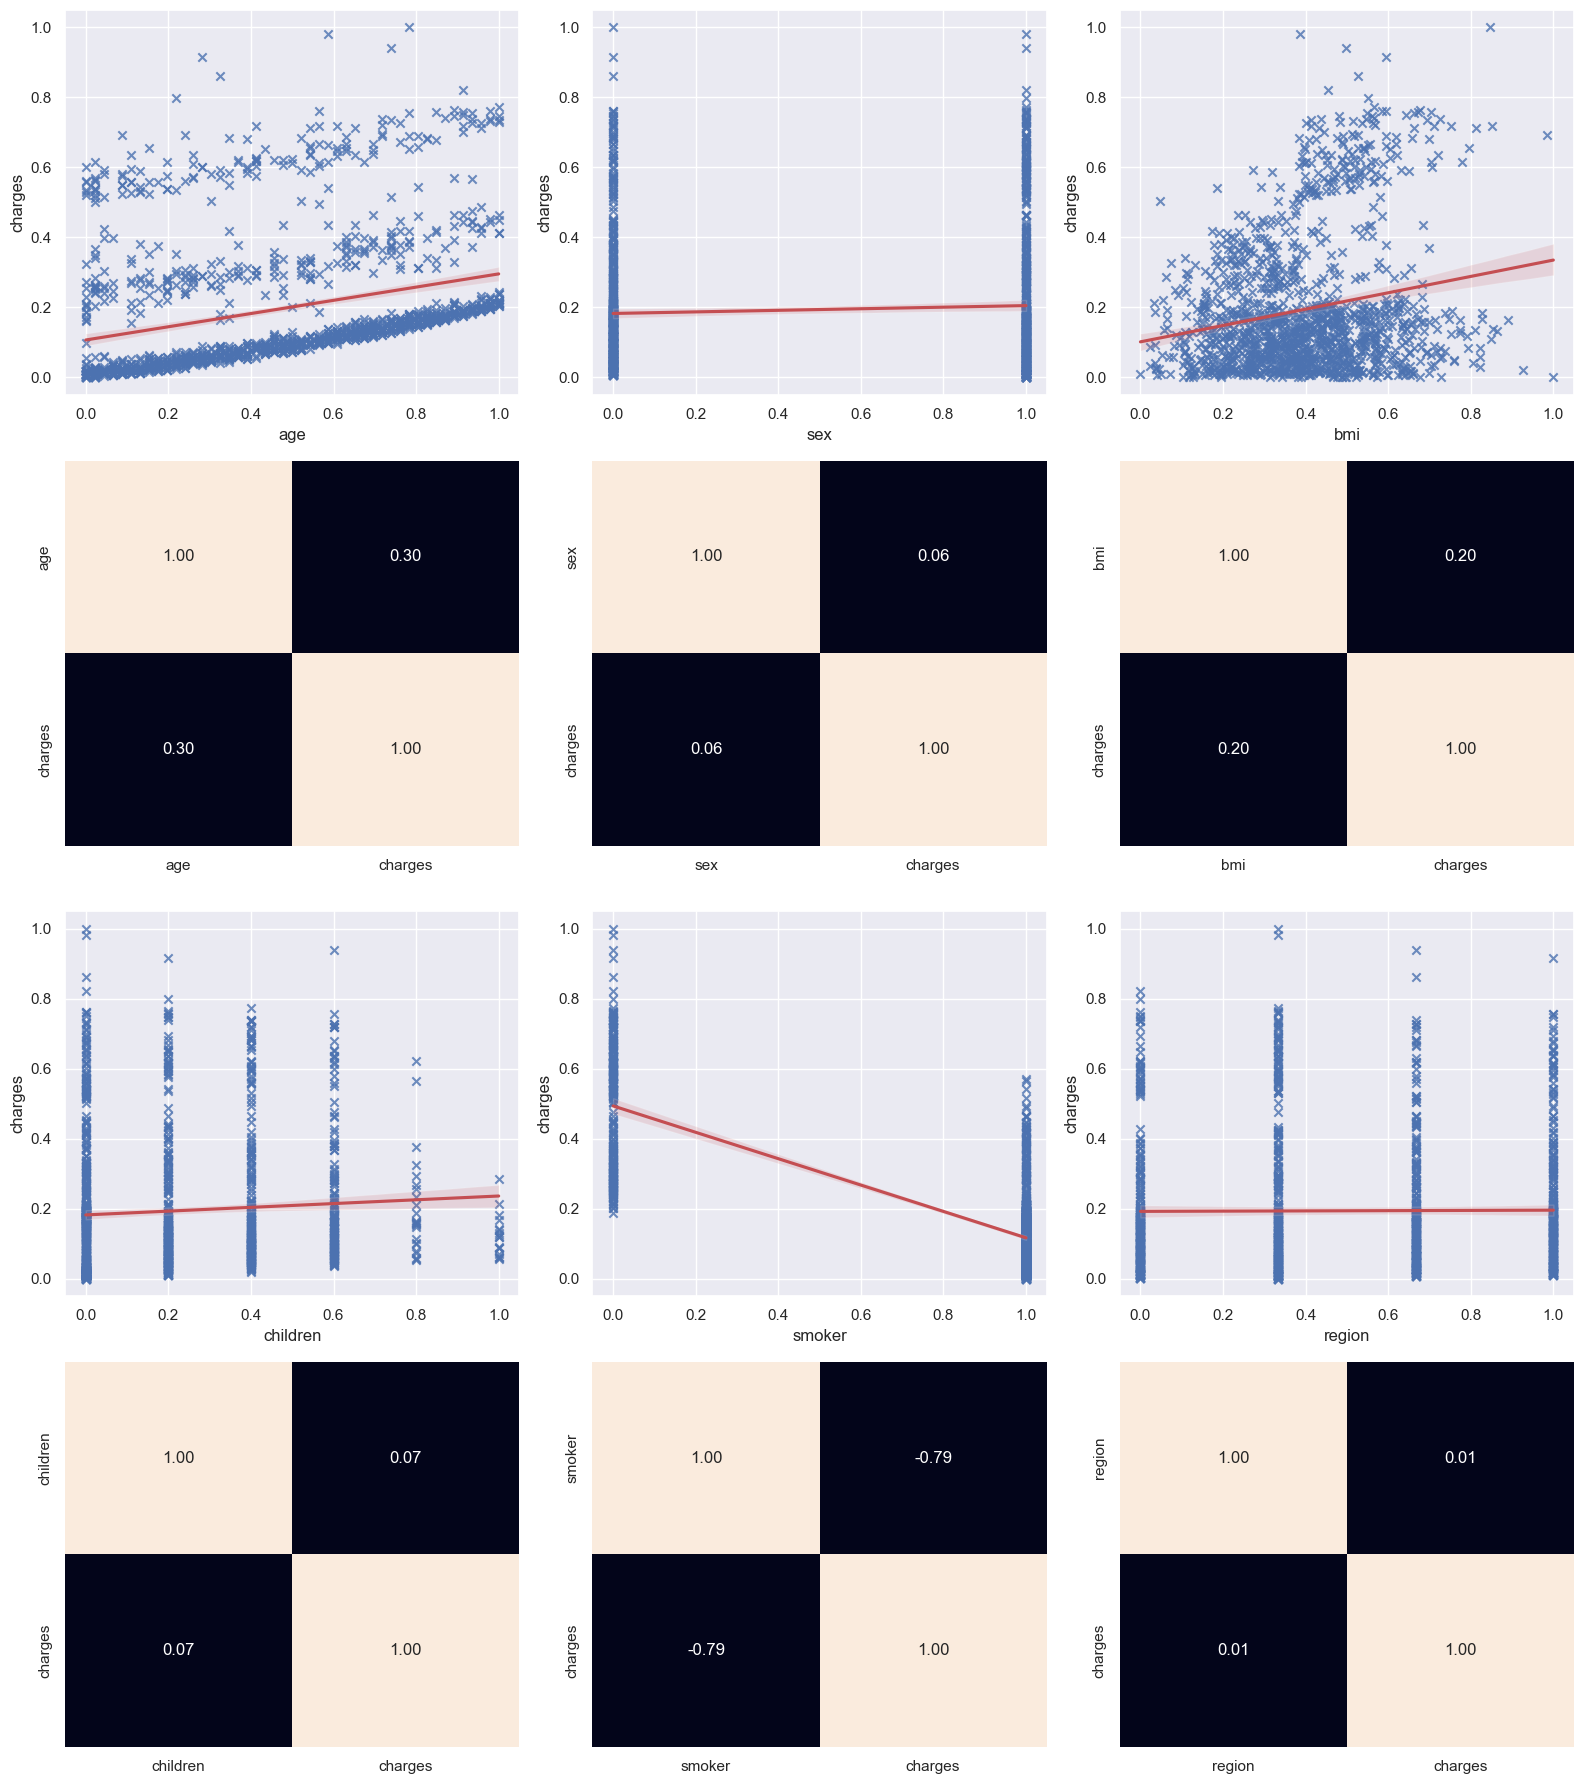

In [42]:
fig, axes = plt.subplots(4, 3, figsize = (16, 18))

sns.regplot(data = total_data, ax = axes[0, 0], x = 'age', y = 'charges', line_kws = dict(color = 'r'), marker = 'x')
sns.heatmap(data = total_data[['age', 'charges']].corr(), ax = axes[1, 0], annot = True, fmt = '.2f', cbar = False)

sns.regplot(data = total_data, ax = axes[0, 1], x = 'sex', y = 'charges', line_kws = dict(color = 'r'), marker = 'x')
sns.heatmap(data = total_data[['sex', 'charges']].corr(), ax = axes[1, 1], annot = True, fmt = '.2f', cbar = False)

sns.regplot(data = total_data, ax = axes[0, 2], x = 'bmi', y = 'charges', line_kws = dict(color = 'r'), marker = 'x')
sns.heatmap(data = total_data[['bmi', 'charges']].corr(), ax = axes[1, 2], annot = True, fmt = '.2f', cbar = False)

# children
sns.regplot(data = total_data, ax = axes[2, 0], x = 'children', y = 'charges', line_kws = dict(color = 'r'), marker = 'x')
sns.heatmap(data = total_data[['children', 'charges']].corr(), ax = axes[3, 0], annot = True, fmt = '.2f', cbar = False)

# smoker
sns.regplot(data = total_data, ax = axes[2, 1], x = 'smoker', y = 'charges', line_kws = dict(color = 'r'), marker = 'x')
sns.heatmap(data = total_data[['smoker', 'charges']].corr(), ax = axes[3, 1], annot = True, fmt = '.2f', cbar = False)

# region
sns.regplot(data = total_data, ax = axes[2, 2], x = 'region', y = 'charges', line_kws = dict(color = 'r'), marker = 'x')
sns.heatmap(data = total_data[['region', 'charges']].corr(), ax = axes[3, 2], annot = True, fmt = '.2f', cbar = False)

plt.tight_layout()
plt.show()

In [43]:
X_train = train_data.drop(['charges'], axis = 1)
y_train = train_data['charges']

X_test = test_data.drop(['charges'], axis = 1)
y_test = test_data['charges']

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
print(f'Intercep (a): {model.intercept_}')
print(f'Coefficients (b1, b2): {model.coef_}')

Intercep (a): 0.31344235743138016
Coefficients (b1, b2): [ 0.18265621 -0.00159134  0.185474    0.04262835 -0.36795985  0.01137896]


In [50]:
y_pred = model.predict(X_test)
y_pred

array([ 0.11107321,  0.07136633,  0.21159985,  0.4885978 ,  0.12827883,
        0.1953619 ,  0.4650671 ,  0.00298129,  0.15527176,  0.16366977,
        0.14941043,  0.51132843,  0.47551792,  0.25614271,  0.15186728,
        0.13172488,  0.04538604,  0.49164921,  0.0313305 ,  0.06949194,
        0.0422447 ,  0.46343277,  0.22275094,  0.46533839,  0.47824218,
        0.07020344,  0.55138865,  0.56265373,  0.16243162,  0.20662249,
        0.0838539 ,  0.18861147, -0.00706463,  0.17280237,  0.61711555,
        0.17605964,  0.05515378,  0.04620457,  0.47927158,  0.1293109 ,
        0.09172841,  0.46152601,  0.54033827,  0.17636648,  0.1012115 ,
        0.03429084,  0.07821545,  0.12283684,  0.05107612,  0.12985632,
        0.09106233,  0.17186162,  0.47907249,  0.04230001,  0.1552407 ,
        0.14147695,  0.1536126 ,  0.02209835,  0.48248129,  0.13285859,
        0.23376452,  0.11636993,  0.18381706,  0.0059923 ,  0.24947555,
        0.15176155,  0.1484482 ,  0.47020092,  0.37440304,  0.24

In [52]:
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')

MSE: 0.009043194261536824
R2 Score: 0.8068466322629111


Linear Regression does not have hyperparameters to optimize.